# Project Setup

## Importing Necessary Library

In [568]:
!pip install ydata_profiling scipy

In [569]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport



from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

from scipy.stats import boxcox
import warnings


In [570]:
warnings.filterwarnings("ignore")

In [571]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploretory Data Analysis and Data Loading

## Loading the dataset

In [572]:
train_data = pd.read_csv("/content/drive/MyDrive/Sanjiavan/Dataset/train.csv")


In [573]:
train_data_copy = train_data.copy(deep = True)

In [574]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Describing the dataset

In [575]:
train_data.shape

(891, 12)

In [576]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## calculating the null values in training data

In [577]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Describing the training data

In [578]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Dropping the PassengerID

In [579]:
train_data.drop("PassengerId", axis = 1, inplace = True)

## visualize and compare the average (mean) values of numerical features for passengers who alive versus dead in Trainnig Data


In [580]:
dead = train_data[train_data["Survived"] == 0].describe().T
alive = train_data[train_data["Survived"] == 1].describe().T




## Numerical feature description of alive people

In [581]:
alive

,count,mean,std,min,25%,50%,75%,max
Survived,342.0,1.000000,0.000000,1.00,1.000,1.0,1.0,1.0000
Pclass,342.0,1.950292,0.863321,1.00,1.000,2.0,3.0,3.0000
Age,290.0,28.343690,14.950952,0.42,19.000,28.0,36.0,80.0000
SibSp,342.0,0.473684,0.708688,0.00,0.000,0.0,1.0,4.0000
Parch,342.0,0.464912,0.771712,0.00,0.000,0.0,1.0,5.0000
Fare,342.0,48.395408,66.596998,0.00,12.475,26.0,57.0,512.3292


## Numerical feature description of dead people

In [582]:
dead

,count,mean,std,min,25%,50%,75%,max
Survived,549.0,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.0
Pclass,549.0,2.531876,0.735805,1.0,2.0000,3.0,3.0,3.0
Age,424.0,30.626179,14.172110,1.0,21.0000,28.0,39.0,74.0
SibSp,549.0,0.553734,1.288399,0.0,0.0000,0.0,1.0,8.0
Parch,549.0,0.329690,0.823166,0.0,0.0000,0.0,0.0,6.0
Fare,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0


## Visualizing the mean value of numerical features of alive and dead people

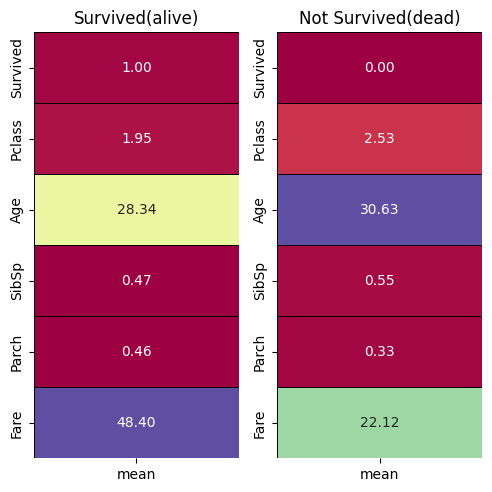

In [583]:
colors = "Spectral"

fig, ax = plt.subplots(1,2,figsize = (5,5))

plt.subplot(1,2,1)
sns.heatmap(alive[["mean"]], annot = True, linewidths = 0.5, linecolor = "black",
           cmap = colors, cbar = False, fmt = ".2f")
plt.title("Survived(alive)")
plt.subplot(1,2,2)
sns.heatmap(dead[["mean"]], annot = True, linewidths = 0.5, linecolor = "black",
           cmap = colors, cbar = False, fmt = ".2f")
plt.title("Not Survived(dead)")
plt.tight_layout(pad =1)
plt.show()

## Missing value percentage in training data

In [584]:
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
percent

,0
Cabin,0.771044
Age,0.198653
Embarked,0.002245
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000
Fare,0.000000


## Imputation

I don't find the Cabin and Ticked columns necessary, so I will drop them.

In [585]:
train_data.drop(["Cabin", "Ticket"], axis = 1, inplace = True)

Let's see Embarked column .

In [586]:
train_data[train_data["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In the later sections, we will see that the survival rate of female passengers in Pclass 1 from Embarked C is high, so I am changing the Embarked value for these two data points to C.

In [587]:
train_data.loc[train_data["Embarked"].isnull(),"Embarked"] = "C"
train_data["Embarked"].isnull().sum()

0

Let's see Age column

About 20% of the data in the Age column is missing. Titles like Master can provide information about age, so we can use the titles in the Name column to fill in the missing values in the Age column.

In [588]:
train_data["Name"].head(5)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [589]:
train_data["Title"] = train_data["Name"].str.extract('([A-Za-z]+)\.', expand=False)

In [590]:
train_data["Age"].dtype

dtype('float64')

### Replacing invalid entries with NaN ensures that subsequent calculations

In [591]:

train_data["Age"] = pd.to_numeric(train_data["Age"], errors='coerce')

In [592]:
train_data["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [593]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [594]:
train_data.groupby(by = "Title")["Title"].value_counts()

,count
Title,
Capt,1
Col,2
Countess,1
Don,1
Dr,7
Jonkheer,1
Lady,1
Major,2
Master,40


In [595]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


In [596]:
train_data["Title"].isnull().sum()

0

### plotting the barplot of age based on the title of passenger

<Axes: xlabel='Title', ylabel='Age'>

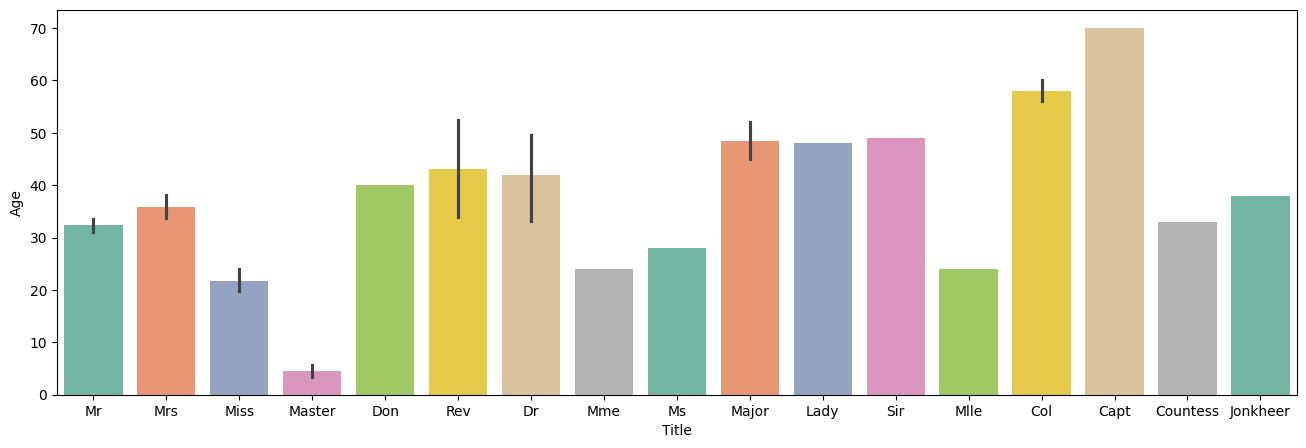

In [597]:
plt.figure(figsize = (16,5))
sns.barplot(data = train_data,x = train_data["Title"], y = train_data["Age"] , palette="Set2")

Mme: madam = mrs

Mlle: Mademoiselle = miss

In [598]:
titles_dict = {"Capt": "Other",
               "Major": "Other",
               "Jonkheer": "Other",
               "Don": "Other",
               "Sir": "Other",
               "Dr": "Other",
               "Rev": "Other",
               "Countess": "Other",
               "Col": "Other",
               "Mme": "Mrs",
               "Mlle": "Miss",
               "Ms": "Miss",
               "Mr": "Mr",
               "Mrs": "Mrs",
               "Miss": "Miss",
               "Master": "Master",
               "Lady": "Other"}

In [599]:
train_data["Title"] = train_data["Title"].map(titles_dict)
train_data["Title"].head(10)

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [600]:
train_data["Title"].isnull().sum()

0

In [601]:
for group in train_data["Title"].unique():
    mean = train_data.loc[train_data["Title"] == group, "Age"].mean()
    train_data.loc[(train_data["Title"] == group) & (train_data["Age"].isnull()),"Age"] = mean

In [602]:
train_data["Age"].isnull().sum()

0

<Axes: xlabel='Age', ylabel='Density'>

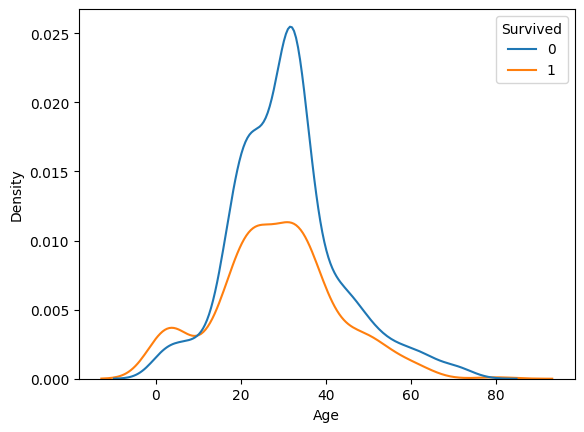

In [603]:
sns.kdeplot(data = train_data, x = "Age", hue = "Survived")

In [604]:
train_data["Title"] = pd.Categorical(train_data["Title"])
train_data.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object
Title,category


In [605]:
train_data["Survived"] = pd.to_numeric(train_data["Survived"], errors='coerce')

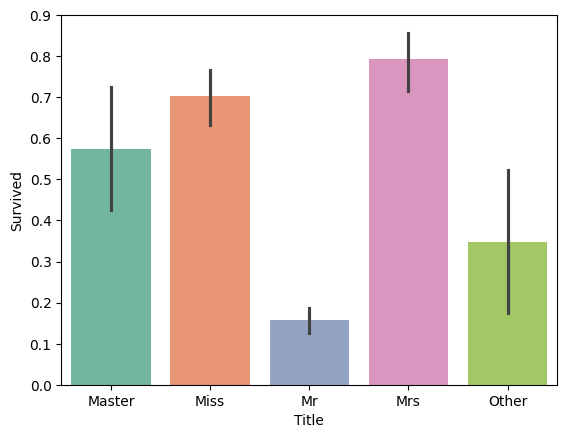

In [606]:
sns.barplot(data = train_data, x='Title', y='Survived' , palette="Set2");

In [607]:
train_data.to_csv("/content/drive/MyDrive/Sanjiavan/Dataset/Model_data.csv", index = False)

In [608]:
categorical_features = train_data[["Survived","Embarked","Pclass","Sex","SibSp","Parch"]]

## Hypotheses

* **Embarked** -> I don't think embarked has a direct impact. There may be a difference between richer regions and poorer regions.
* **Pclass** -> I think high class people survived more than low class people.
* **Sex** -> I think females survived more than males.
* **SibSp (spouse-sibling)** -> Spouses and siblings may increase chances of survival
* **Parch (Parent, child)** -> Likewise parents and children may increase changes of survivel (may be women boarding boats with their children)
*  **Fare** -> I think people of gives high fare survived more than others like Pclass
*  **Age** -> I think children were given priority and because of this the children survived more than other age groups. As for the elderly, may be the rich ones or female ones survived, .but I think the poor male ones most likely did not survive.

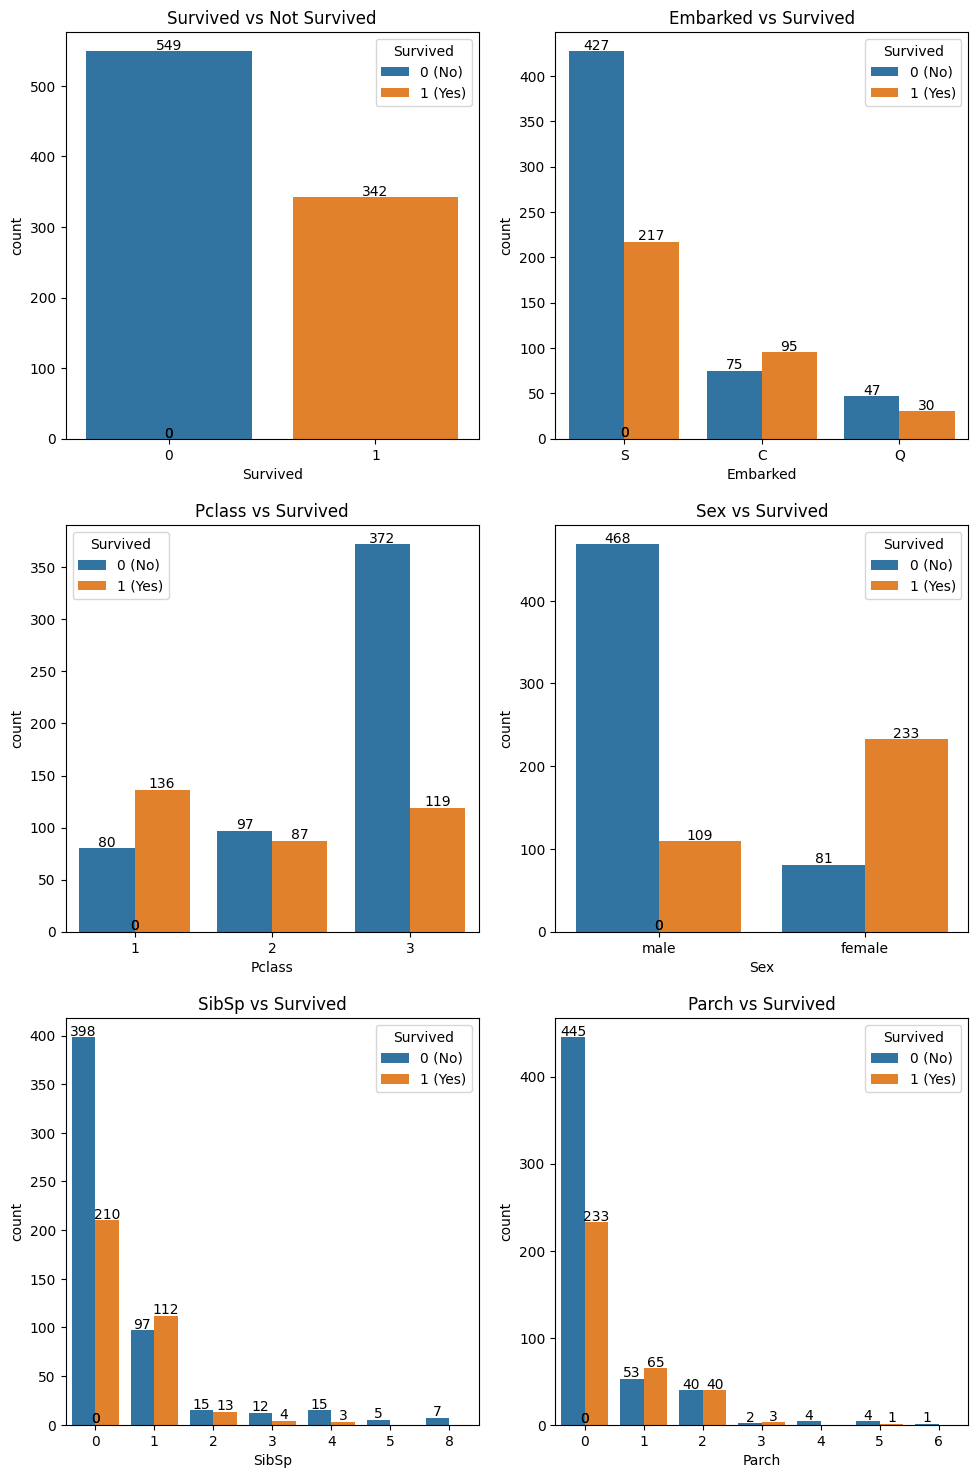

In [609]:
fig, ax = plt.subplots(3,2,figsize = (10,15))

for i in range(len(categorical_features.columns)):
    plt.subplot(3,2,i+1)

    sns.countplot(data = categorical_features, x = categorical_features.columns[i], hue = "Survived")

    if categorical_features.columns[i] == "Survived":
        plt.title("Survived vs Not Survived")
    else:
        plt.title(categorical_features.columns[i] + " vs Survived")
     # Set the legend with custom labels
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = ['0 (No)', '1 (Yes)']  # Custom labels for legend
    plt.legend(handles, labels, title="Survived")

    ax = plt.gca()
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() +2, f"{rect.get_height():.0f}",
                   horizontalalignment="center", fontsize = 10)

plt.tight_layout(pad = 1.5)
plt.show()

* We observe that our predictions regarding the impact of Pclass and Sex on survival rates are accurate.
* Embarked seems to be related to Survived rate, but I will investigate it in more detail.
* While SibSp values of 1 and 2 increase the survival rate, higher values seem to decrease it. Likewise Parch 1,2 and 3 increase the survival rate, higher values seem to decrease it, interesting result, maybe we can examine it in more detail.  

### Lets analyze Fare

([<matplotlib.axis.XTick at 0x7f2f0301e290>,
 [Text(0, 0, '0 (NO)'), Text(1, 0, '1 (YES)')])

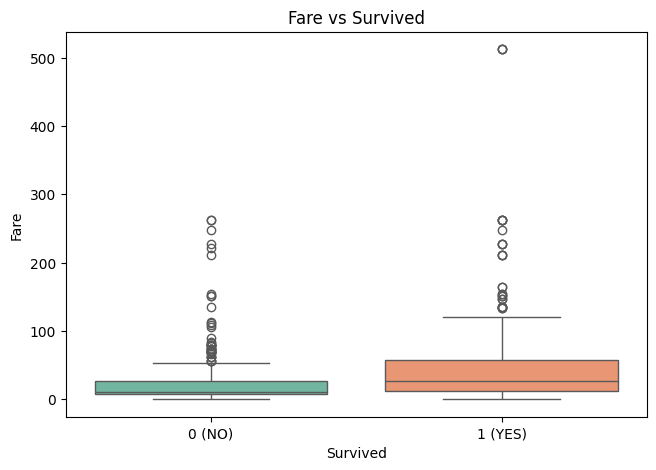

In [610]:
plt.figure(figsize=(7.5,5))
sns.boxplot(data = train_data, x = train_data['Survived'], y = train_data['Fare'], palette='Set2')
plt.title("Fare vs Survived")
plt.xticks(ticks = [0,1], labels = ["0 (NO)","1 (YES)"])

Text(0.5, 1.0, 'Fare vs Survived')

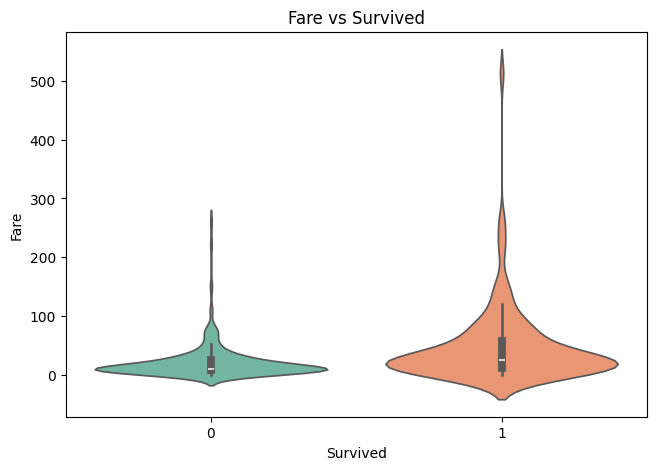

In [611]:
plt.figure(figsize=(7.5,5))
sns.violinplot(data = train_data, x = train_data['Survived'], y = train_data['Fare'] ,palette='Set2' )
plt.title("Fare vs Survived")

Text(0.5, 1.0, 'Fare vs Pclass')

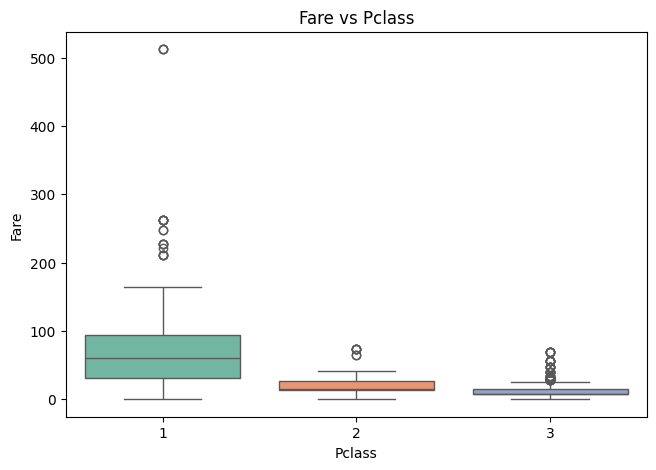

In [612]:
plt.figure(figsize=(7.5,5))
sns.boxplot(data = train_data, x = train_data['Pclass'], y = train_data['Fare'], palette = "Set2")
plt.title("Fare vs Pclass")

* A high fare gives a higher survival rate compared to others.

### Let's divide the age into groups and analyze it.

In [613]:
train_data.loc[train_data["Age"] >= 50,"AgeGroup"] = "elder"
train_data.loc[(train_data["Age"] > 15) & (train_data["Age"] < 50), "AgeGroup"] = "adult"
train_data.loc[train_data["Age"] <= 15,"AgeGroup"] = "child"
train_data["AgeGroup"].value_counts()

,count
AgeGroup,
adult,730
child,87
elder,74


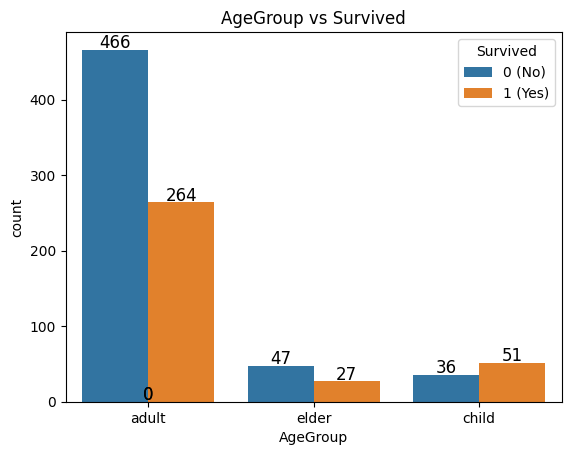

In [614]:
ax = sns.countplot(data = train_data, x = "AgeGroup", hue = "Survived")
labels = ['0 (No)', '1 (Yes)']  # Custom labels for legend
plt.legend(handles, labels, title="Survived")
plt.title("AgeGroup vs Survived")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

* Yes, as we predicted, the survival rate of children is higher than the other groups.

### Let's look at the elders in more detail.

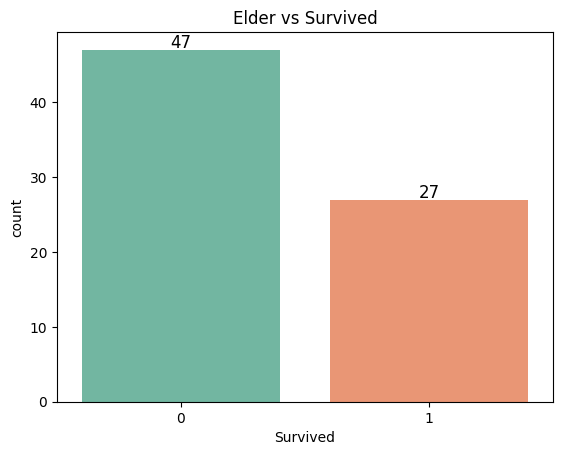

In [615]:

ax = sns.countplot(data=train_data[train_data["AgeGroup"] == "elder"], x="Survived", palette = "Set2")
plt.title("Elder vs Survived")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()


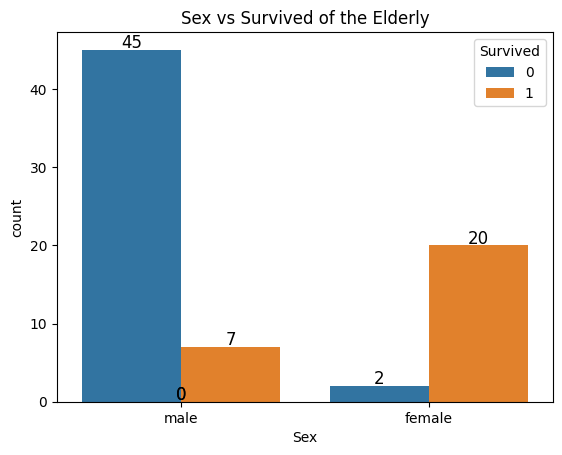

In [616]:
ax =sns.countplot(data=train_data[train_data["AgeGroup"] == "elder"], x = "Sex", hue = "Survived")
plt.title("Sex vs Survived of the Elderly")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

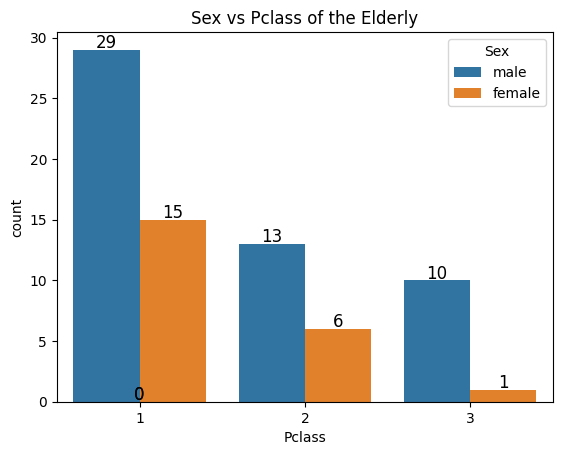

In [617]:
ax = sns.countplot(data = train_data[train_data["AgeGroup"] == "elder"], x = "Pclass", hue = "Sex" )
plt.title("Sex vs Pclass of the Elderly")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

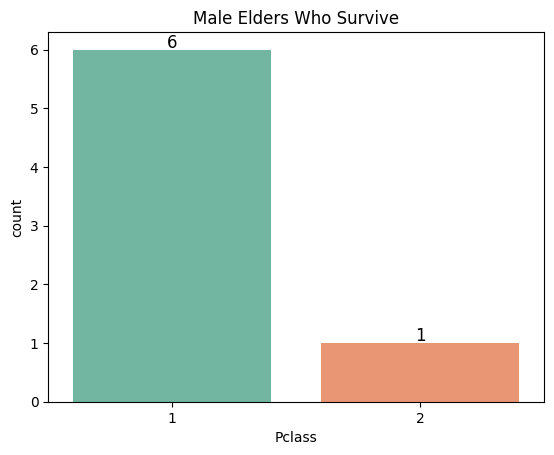

In [618]:
ax =  sns.countplot(data=train_data[(train_data["AgeGroup"] == "elder") & (train_data["Survived"] ==1) & (train_data["Sex"] == "male")],
                    x = "Pclass", palette = "Set2")
plt.title("Male Elders Who Survive")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

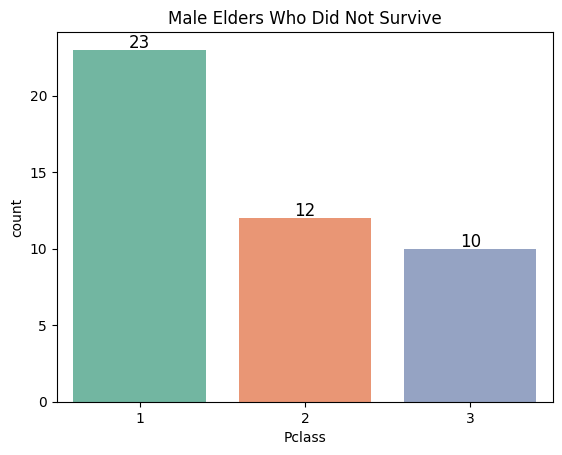

In [619]:
ax = sns.countplot(data=train_data[(train_data["AgeGroup"] == "elder") & (train_data["Survived"] ==0) & (train_data["Sex"] == "male")],
                    x = "Pclass" , palette = "Set2")
plt.title("Male Elders Who Did Not Survive")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

* This prediction is also correct; most of the elderly did not survive. Among the survivors, the vast majority are women, while the surviving men are mostly from Pclass 1 and 2. No men from Pclass 3 survived...

### Let's look at Embarked in more detail.

In [620]:
print(train_data[train_data["Embarked"] == "S"]["Pclass"].groupby(by = train_data["Embarked"]).value_counts())
print("-"*50)
print(train_data[train_data["Embarked"] == "C"]["Pclass"].groupby(by = train_data["Embarked"]).value_counts())
print("-"*50)
print(train_data[train_data["Embarked"] == "Q"]["Pclass"].groupby(by = train_data["Embarked"]).value_counts())


Embarked  Pclass
S         3         353
          2         164
          1         127
Name: count, dtype: int64
--------------------------------------------------
Embarked  Pclass
C         1         87
          3         66
          2         17
Name: count, dtype: int64
--------------------------------------------------
Embarked  Pclass
Q         3         72
          2          3
          1          2
Name: count, dtype: int64


In [621]:
print(train_data[train_data["Embarked"] == "S"]["Sex"].groupby(by = train_data["Embarked"]).value_counts())
print("-"*50)
print(train_data[train_data["Embarked"] == "C"]["Sex"].groupby(by = train_data["Embarked"]).value_counts())

print("-"*50)
print(train_data[train_data["Embarked"] == "Q"]["Sex"].groupby(by = train_data["Embarked"]).value_counts())


Embarked  Sex   
S         male      441
          female    203
Name: count, dtype: int64
--------------------------------------------------
Embarked  Sex   
C         male      95
          female    75
Name: count, dtype: int64
--------------------------------------------------
Embarked  Sex   
Q         male      41
          female    36
Name: count, dtype: int64


In [622]:
print("Embarked S")
print(train_data[train_data["Embarked"] == "S"]["Sex"].groupby(by = train_data["Survived"]).value_counts())
print("-"*50)
print("\nEmbarked C")
print(train_data[train_data["Embarked"] == "C"]["Sex"].groupby(by = train_data["Survived"]).value_counts())
print("-"*50)
print("\nEmbarked Q")
print(train_data[train_data["Embarked"] == "Q"]["Sex"].groupby(by = train_data["Survived"]).value_counts())


Embarked S
Survived  Sex   
0         male      364
          female     63
1         female    140
          male       77
Name: count, dtype: int64
--------------------------------------------------

Embarked C
Survived  Sex   
0         male      66
          female     9
1         female    66
          male      29
Name: count, dtype: int64
--------------------------------------------------

Embarked Q
Survived  Sex   
0         male      38
          female     9
1         female    27
          male       3
Name: count, dtype: int64


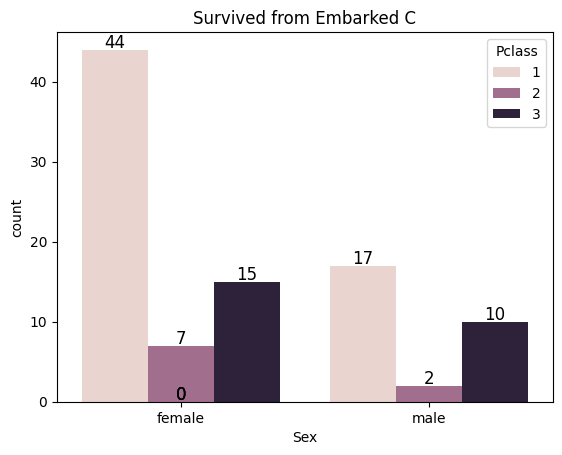

In [623]:
ax = sns.countplot(data = train_data[(train_data["Embarked"] == "C") & (train_data["Survived"] == 1)]
              , x = "Sex", hue = "Pclass")
plt.title("Survived from Embarked C")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

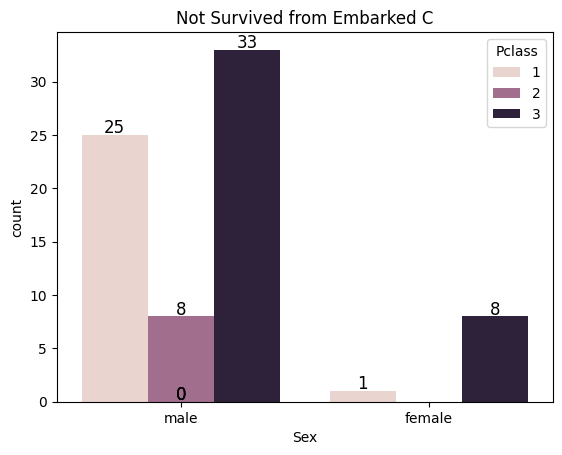

In [624]:
ax = sns.countplot(data = train_data[(train_data["Embarked"] == "C") & (train_data["Survived"] == 0)]
              , x = "Sex", hue = "Pclass")
plt.title("Not Survived from Embarked C")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

* We see that the reason for the higher number of survivors at port Q is the nearly equal number of women and men. At port C, the survival rate of men is higher compared to the other two ports, and we observe that the reason for this is Pclass.

# Feature Engineering

In [625]:
train_data.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object
Title,category


I will drop the Name, Title and AgeGroup columns as we do not need them anymore.

In [626]:
train_data.drop(["Name","Title","AgeGroup"], axis = 1, inplace = True)

In [627]:
train_data["Pclass"] = pd.Categorical(train_data["Pclass"])
train_data["Sex"] = pd.Categorical(train_data["Sex"])

In [628]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00000,1,0,7.2500,S
1,1,1,female,38.00000,1,0,71.2833,C
2,1,3,female,26.00000,0,0,7.9250,S
3,1,1,female,35.00000,1,0,53.1000,S
4,0,3,male,35.00000,0,0,8.0500,S
5,0,3,male,32.36809,0,0,8.4583,Q
6,0,1,male,54.00000,0,0,51.8625,S
7,0,3,male,2.00000,3,1,21.0750,S
8,1,3,female,27.00000,0,2,11.1333,S
9,1,2,female,14.00000,1,0,30.0708,C


In [629]:
X = train_data.drop("Survived", axis = 1)
y = train_data["Survived"]

## Transforming Categorical Feature

In [630]:
X = pd.get_dummies(X,drop_first = 1)
X.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,False,True,True,False,True
1,38.0,1,0,71.2833,False,False,False,False,False
2,26.0,0,0,7.9250,False,True,False,False,True
3,35.0,1,0,53.1000,False,False,False,False,True
4,35.0,0,0,8.0500,False,True,True,False,True


In [631]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [632]:
X_train.shape

(712, 9)

In [633]:
X_test.shape

(179, 9)

In [634]:
# data_copy = data_copy.loc[X_test.index]
# data_copy

In [635]:
# sns.countplot(data = X_train, x = X_train["Fare"], palette = "Set2")

In [636]:
min_max_scaler = MinMaxScaler()

X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [637]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [638]:
X_train_poly.shape

(712, 55)

In [639]:
print(poly.get_feature_names_out())

['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x0^2' 'x0 x1' 'x0 x2'
 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8' 'x1^2' 'x1 x2' 'x1 x3'
 'x1 x4' 'x1 x5' 'x1 x6' 'x1 x7' 'x1 x8' 'x2^2' 'x2 x3' 'x2 x4' 'x2 x5'
 'x2 x6' 'x2 x7' 'x2 x8' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8'
 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7' 'x4 x8' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8'
 'x6^2' 'x6 x7' 'x6 x8' 'x7^2' 'x7 x8' 'x8^2']


## Logistic Regression Cross Validation Scores (10 CV used on training data)

In [640]:
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_poly, y_train)
scores = cross_val_score(logreg, X_train_poly, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

CV accuracy: 0.809 +/- 0.067


## Support Vector Classifier (10 CV used on trainning data)

In [641]:
svm = SVC(random_state = 42)
svm.fit(X_train_poly, y_train)
scores = cross_val_score(svm, X_train_poly, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

CV accuracy: 0.816 +/- 0.067


## Random forest Classifier (10 CV used on training data)

In [642]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_poly, y_train)
scores = cross_val_score(rf, X_train_poly, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

CV accuracy: 0.799 +/- 0.037


## Learning Curve - Hyperparameter  Tuning

This code generates a **learning curve** to visualize how a model's performance changes with increasing training data. It compares the **training accuracy** and **validation accuracy** for different training set sizes, which are split into **7 portions** (10%, 25%, ..., 100%) of the total training data (712 samples), and evaluated using **5-fold cross-validation**. The plot helps identify issues like **overfitting** or **underfitting** and shows how much data is needed for the model to generalize well.

In [643]:
def plot_learning_curve(estimator,title,cv):

    train_sizes, train_scores, valid_scores = learning_curve(estimator = estimator, X = X_train_poly,
                     y = y_train,train_sizes = np.linspace(0.1,1.0,7), cv =cv,scoring = "accuracy")

    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis=1)

    valid_mean = np.mean(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)

    plt.figure(figsize = (10,6))

    plt.plot(train_sizes, train_mean, label = "Train Score", color = "r")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "r", alpha = 0.1)

    plt.plot(train_sizes, valid_mean, label = "Validation Score", color = "g")
    plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color = "g", alpha = 0.1)

    plt.plot(train_sizes, train_mean, "o-", color = "r")
    plt.plot(train_sizes, valid_mean, "o-", color = "g")

    plt.xlabel("Train Size")
    plt.ylabel("Score")
    plt.title("Learning Curve of " + title)
    plt.legend()
    plt.show()

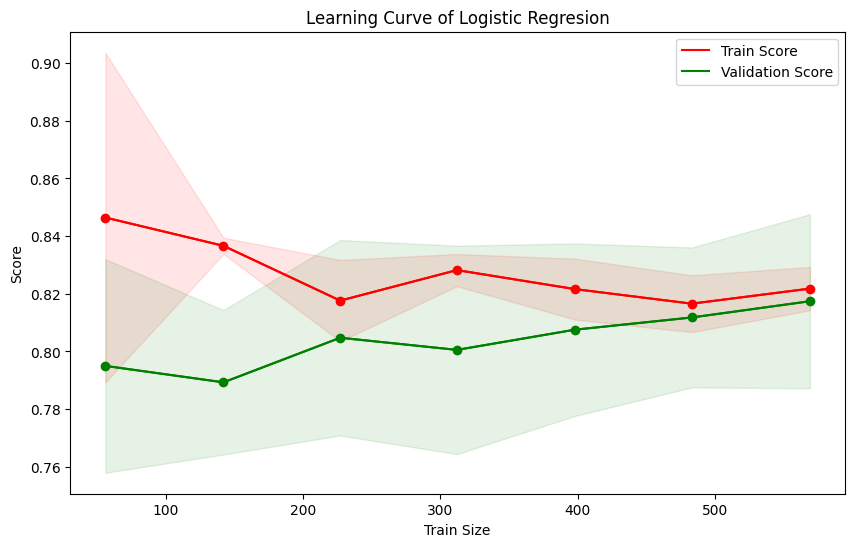

In [644]:
plot_learning_curve(logreg,"Logistic Regresion",5)

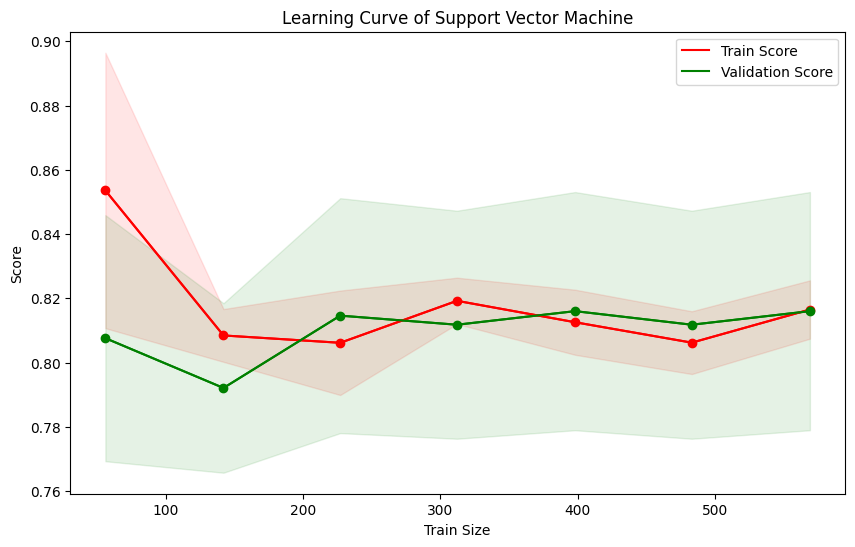

In [645]:
plot_learning_curve(svm, "Support Vector Machine",5)

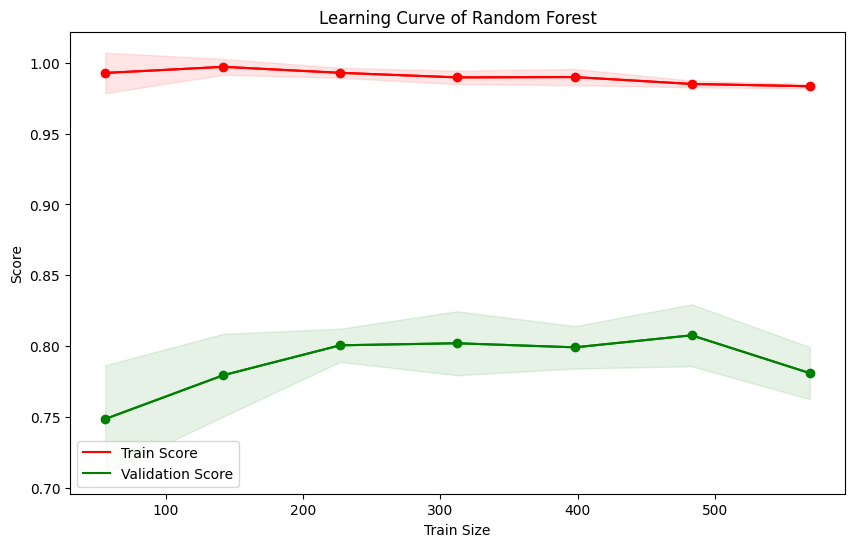

In [646]:
plot_learning_curve(rf, "Random Forest",5)

Our Random Forest model is overfitting.

# validation curve - Hyperparams Tuning


This code generates a validation curve to visualize how the performance of a model changes with different values of a specific hyperparameter. It compares the training accuracy and validation accuracy for various values of a hyperparameter (specified by param_name and param_range), evaluated using 5-fold cross-validation. The plot helps identify the optimal value for the hyperparameter and provides insights into overfitting or underfitting by showing how performance varies with different hyperparameter values.

In [647]:
def plot_validation_curve(estimator, param_name, param_range, title, cv = 5 ,scale = "log"):


    train_scores, valid_scores = validation_curve(estimator = estimator, X = X_train_poly, y = y_train,
                       param_name = param_name,param_range = param_range, cv = cv, scoring ="accuracy")

    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    valid_mean = np.mean(valid_scores, axis = 1)
    valid_std = np.std(valid_scores, axis = 1)

    plt.figure(figsize = (10,7))

    plt.plot(param_range, train_mean, label = "Training Score", color = "r")
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color = "r", alpha = 0.1)

    plt.plot(param_range, valid_mean, label = "Valid Score", color = "g")
    plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, color = "g", alpha = 0.1)

    plt.plot(param_range, train_mean, "o-", color = "r")
    plt.plot(param_range, valid_mean, "o-", color = "g")


    plt.xscale(scale)
    plt.xlabel(param_name + " Hyperparameter")
    plt.ylabel("Score")
    plt.title("Validation Curve of "+ title)
    plt.legend()
    plt.show()

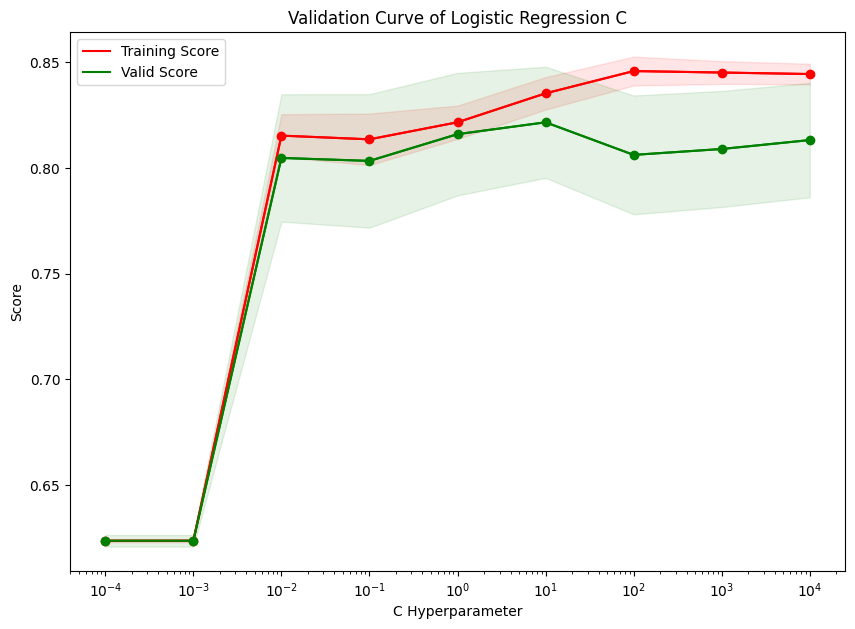

In [648]:
param_name = "C"
param_range = [0.0001, 0.001, 0.01, 0.1, 1 , 10, 100, 1000, 10000]
plot_validation_curve(logreg, param_name , param_range, title = "Logistic Regression C", cv = 5, scale ="log")

10 is good.

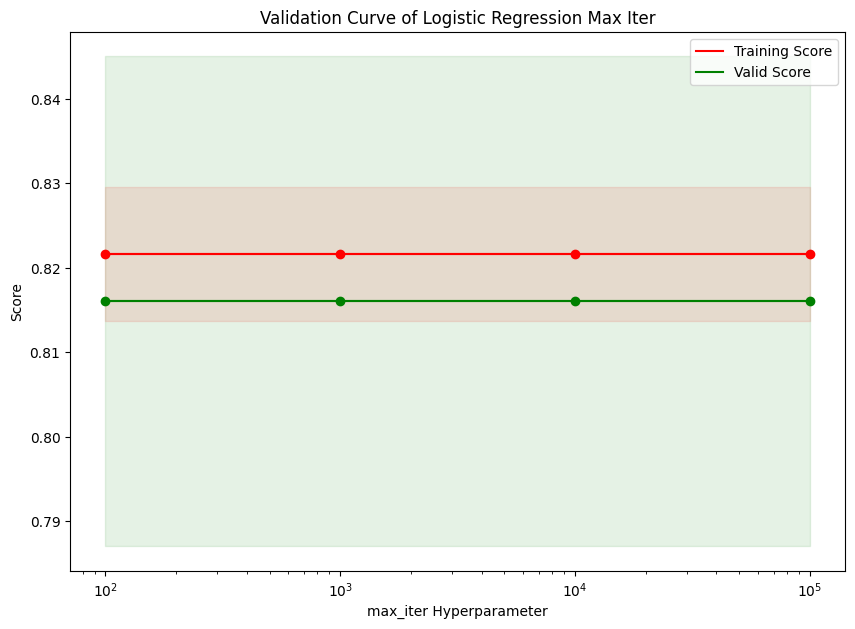

In [649]:
param_name = "max_iter"
param_range = [100, 1000, 10000, 100000]
plot_validation_curve(logreg, param_name , param_range, title = "Logistic Regression Max Iter", cv = 5, scale ="log")

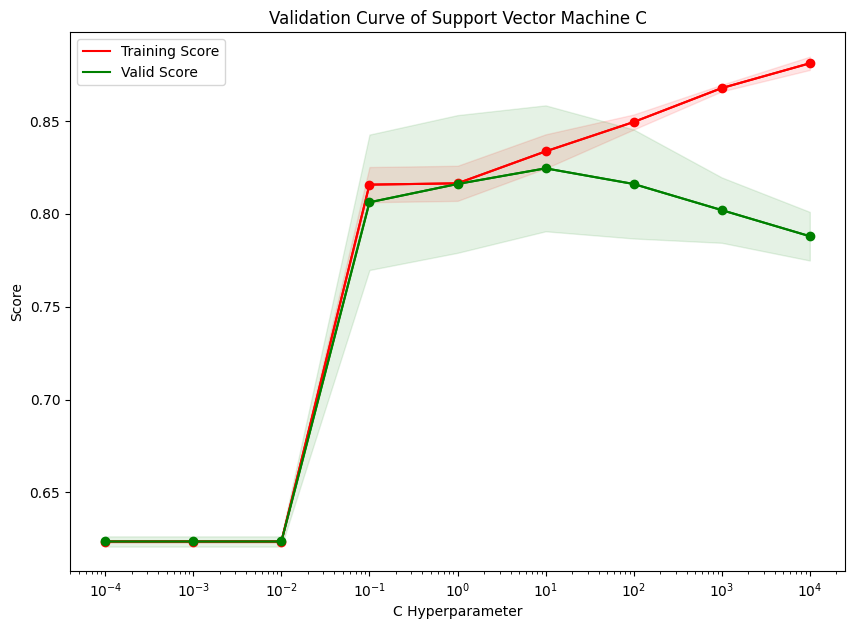

In [650]:
param_name = "C"
param_range = [0.0001, 0.001, 0.01, 0.1, 1 , 10, 100, 1000, 10000]
plot_validation_curve(svm, param_name , param_range, title = "Support Vector Machine C", cv = 5, scale ="log")

10 is good.

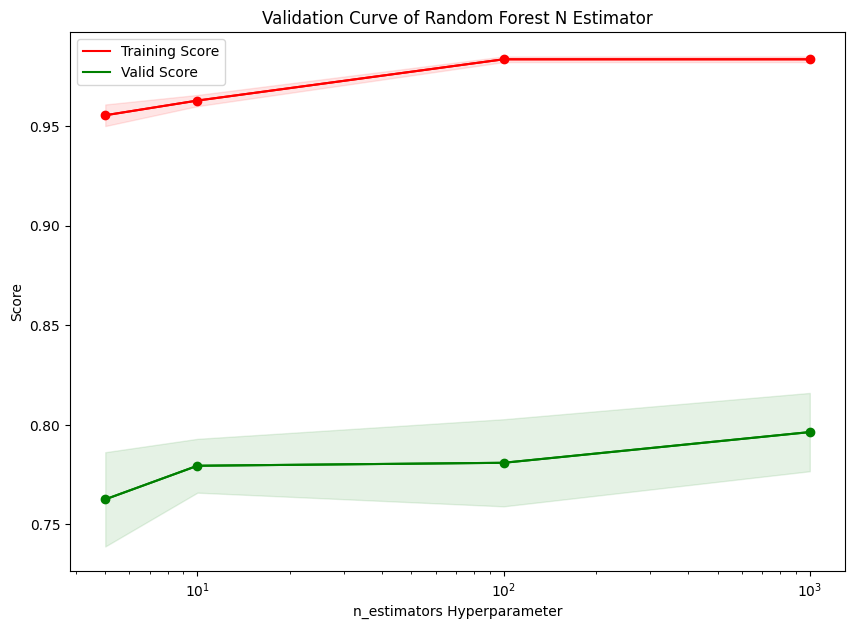

In [651]:
param_name = "n_estimators"
param_range = [5, 10, 100, 1000]
plot_validation_curve(rf, param_name , param_range, title = "Random Forest N Estimator",
                      cv = 5, scale ="log")

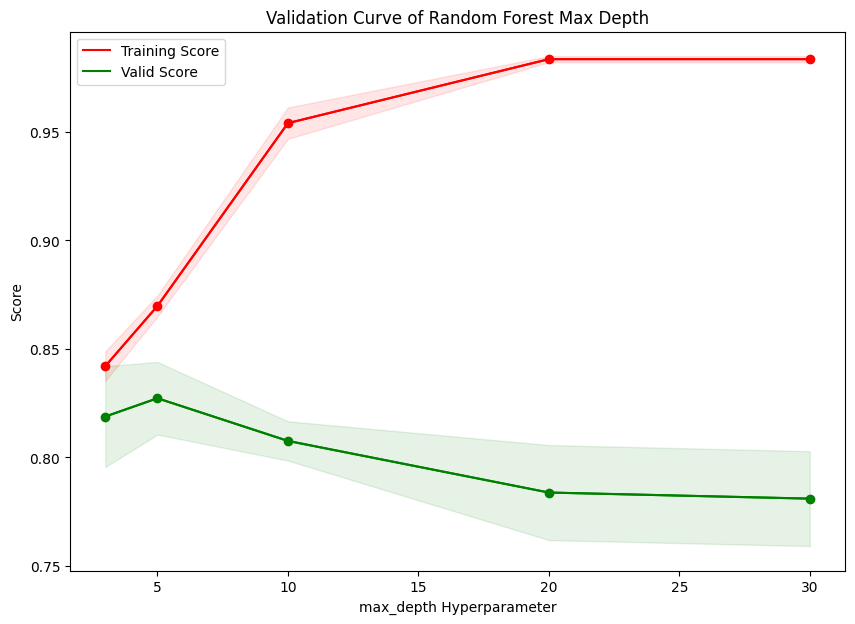

In [652]:
param_name = "max_depth"
param_range = [3,5,10, 20, 30]
plot_validation_curve(rf, param_name , param_range, title = "Random Forest Max Depth", cv = 5, scale ="linear")

5 is good.

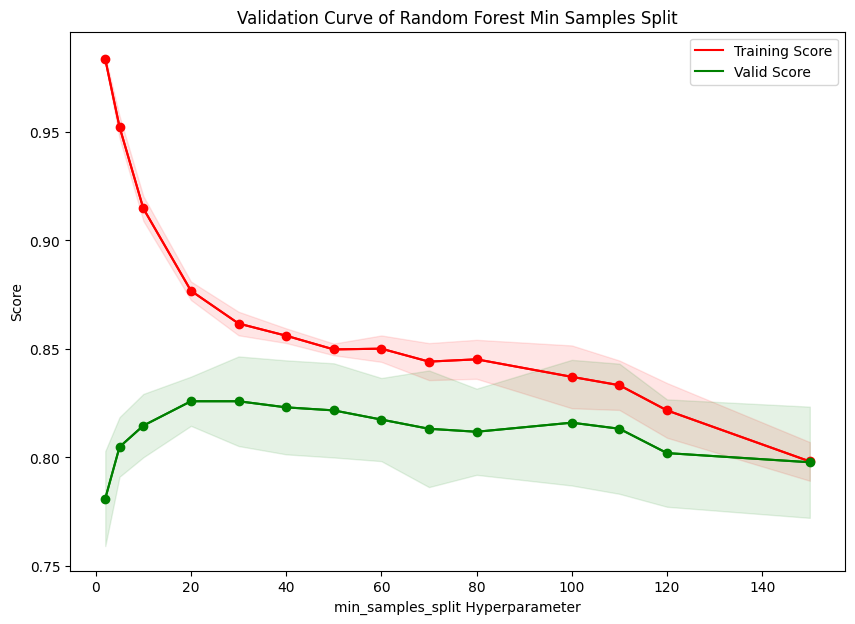

In [653]:
param_name = "min_samples_split"
param_range = [2,5,10,20,30,40,50,60,70,80,100,110,120,150]
plot_validation_curve(rf, param_name , param_range, title = "Random Forest Min Samples Split", cv = 5, scale ="linear")

100 is good.

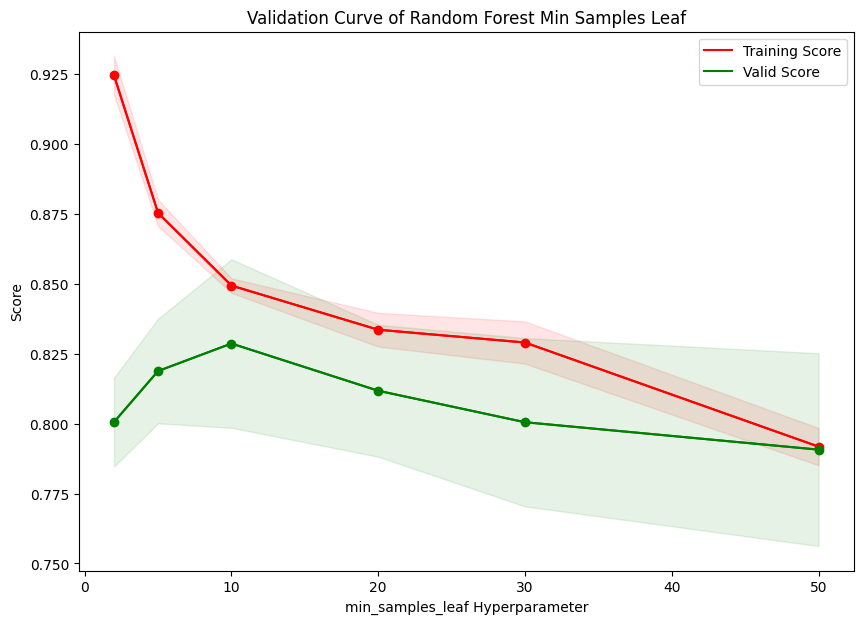

In [654]:
param_name = "min_samples_leaf"
param_range = [2,5,10,20,30,50]
plot_validation_curve(rf, param_name , param_range, title = "Random Forest Min Samples Leaf", cv = 5, scale ="linear")

10 is good.

## Validation Score After Hyper Params Tuning

In [655]:
logreg = LogisticRegression(C = 10, random_state = 42)
logreg.fit(X_train_poly, y_train)
scores = cross_val_score(logreg, X_train_poly, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

CV accuracy: 0.817 +/- 0.064


In [656]:
svm = SVC(C = 10, random_state = 42)
svm.fit(X_train_poly, y_train)
scores = cross_val_score(svm, X_train_poly, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

CV accuracy: 0.826 +/- 0.064


In [657]:
rf = RandomForestClassifier(n_estimators = 1000, max_depth = 5, min_samples_split = 100,
                            min_samples_leaf = 10,random_state = 42)
rf.fit(X_train_poly, y_train)
scores = cross_val_score(rf, X_train_poly, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

CV accuracy: 0.822 +/- 0.077


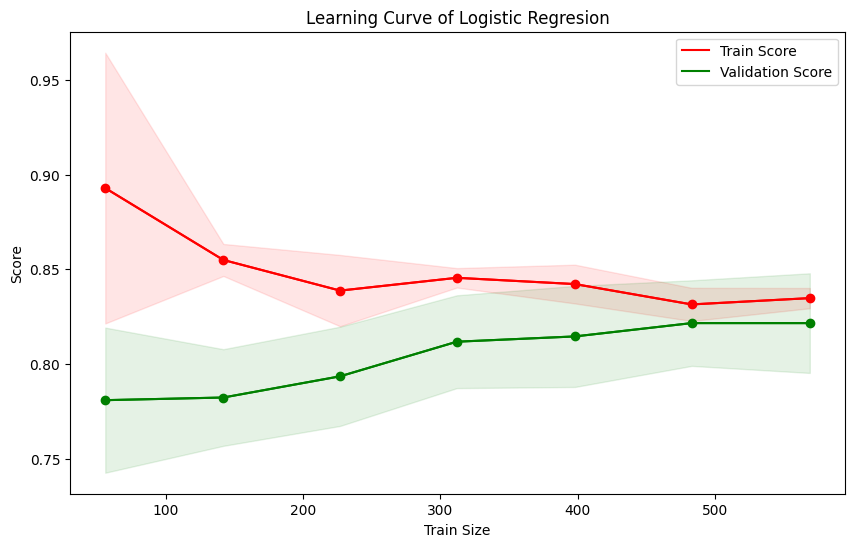

In [658]:
plot_learning_curve(logreg,"Logistic Regresion",5)

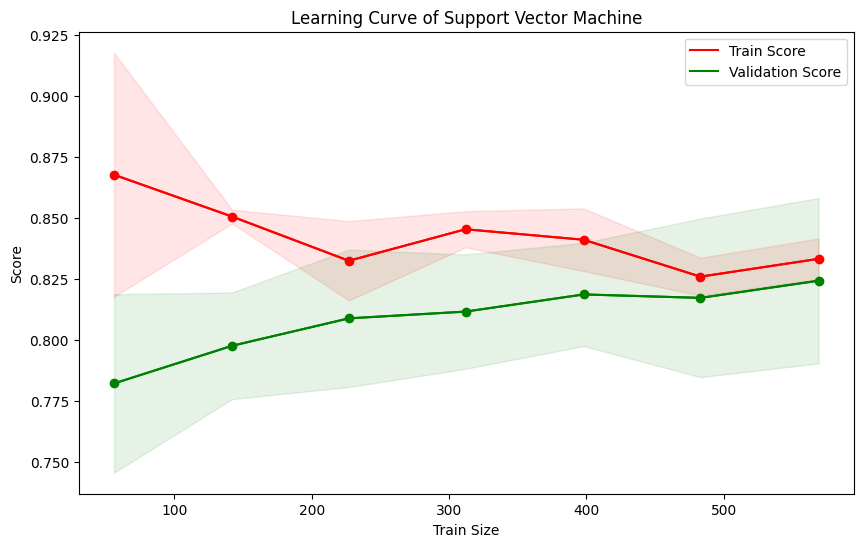

In [659]:
plot_learning_curve(svm, "Support Vector Machine",5)

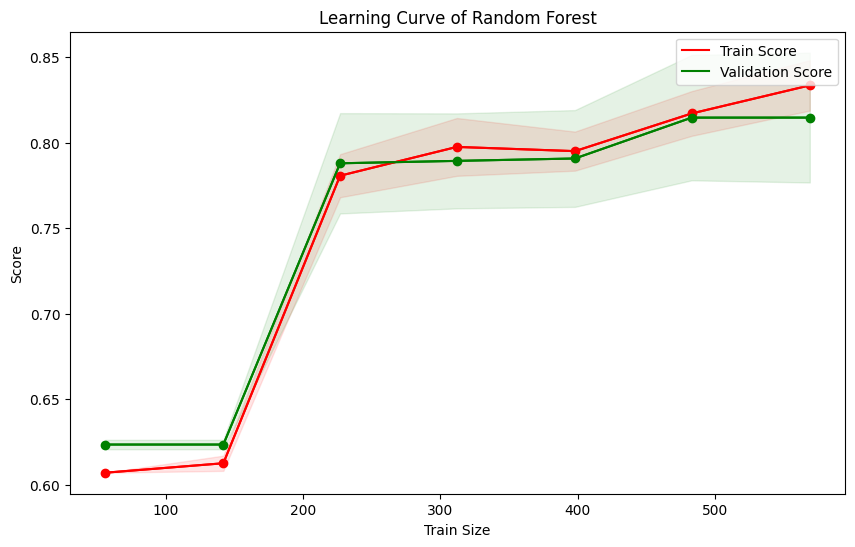

In [660]:
plot_learning_curve(rf, "Random Forest",5)

We improved our accuracy scores across three estimators through hyperparameter tuning and resolved the overfitting issue in the Random Forest model.

# Model Prediction Accuracy

In [661]:
y_pred_svm = svm.predict(X_test_poly)
print("accuracy:", accuracy_score(y_test,y_pred_svm) )

accuracy: 0.8100558659217877


In [662]:
y_pred_rf = rf.predict(X_test_poly)
print("accuracy:", accuracy_score(y_test,y_pred_rf) )

accuracy: 0.8044692737430168


In [663]:
y_pred_logreg = logreg.predict(X_test_poly)
print("accuracy:", accuracy_score(y_test,y_pred_logreg) )

accuracy: 0.8268156424581006




Based on the results from the Titanic dataset, the models tested for survival classification show the following accuracies:

1. **Logistic Regression**: 0.83
2. **SVM**: 0.81
3. **Random Forest**: 0.80

**Conclusion**: Logistic regression outperformed both SVM and Random Forest in terms of accuracy on the test data. While SVM and Random Forest also performed reasonably well, with accuracies around 81% and 80%, logistic regression provides the best model for this dataset.

### Saving Model

In [664]:
import pickle
file_path = '/content/drive/MyDrive/Sanjiavan/logistic_regression_model.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(logreg, f)

print("Model saved successfully to Google Drive!")

Model saved successfully to Google Drive!


# Model Inference - We need to preprocess the data and conveting into same forma so model can inference on that data and generate the final prediction





In [665]:
inference_data = pd.read_csv("/content/drive/MyDrive/Sanjiavan/Dataset/test.csv")

In [666]:
inference_data.shape

(418, 11)

In [667]:
inference_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [668]:
inference_data.drop(["Cabin"], axis = 1, inplace = True)

In [669]:
inference_data_cleaned = inference_data.dropna(subset=['Fare'])

In [670]:
inference_data_cleaned.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [671]:
inference_data_cleaned.shape

(417, 10)

In [672]:
inference_data_cleaned["Title"] = inference_data_cleaned["Name"].str.extract('([A-Za-z]+)\.', expand=False)

In [673]:
inference_data_cleaned["Title"].isnull().sum()

0

In [674]:
inference_data_cleaned["Title"] = inference_data_cleaned["Title"].map(titles_dict)

In [675]:
inference_data_cleaned["Title"].isnull().sum()

1

In [676]:
inference_data_cleaned = inference_data_cleaned.dropna(subset=['Title'])

In [677]:
inference_data_cleaned["Title"].isnull().sum()

0

In [678]:
for group in inference_data_cleaned["Title"].unique():
    mean = inference_data_cleaned.loc[inference_data_cleaned["Title"] == group, "Age"].mean()
    inference_data_cleaned.loc[(inference_data_cleaned["Title"] == group) & (inference_data_cleaned["Age"].isnull()),"Age"] = mean

In [679]:
inference_data_cleaned.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [680]:
inference_data_cleaned.shape

(416, 11)

In [681]:
inference_df =  inference_data_cleaned.copy()

In [682]:
Merge_df = inference_df.copy()

In [683]:
inference_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs


In [684]:
inference_df.drop(["Name","PassengerId", "Ticket", "Title"], axis = 1, inplace = True)

In [685]:
inference_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [686]:
inference_df.shape

(416, 7)

In [687]:
inference_df["Pclass"] = pd.Categorical(inference_df["Pclass"])


In [688]:
inference_df = pd.get_dummies(inference_df,drop_first = 1)
inference_df.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,False,True,True,True,False
1,47.0,1,0,7.0000,False,True,False,False,True
2,62.0,0,0,9.6875,True,False,True,True,False
3,27.0,0,0,8.6625,False,True,True,False,True
4,22.0,1,1,12.2875,False,True,False,False,True


In [689]:
inference_df_scaled = min_max_scaler.transform(inference_df)

In [690]:
inference_df_scaled

array([[0.4282483 , 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.58532295, 0.125     , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.77381252, 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.47851219, 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.39486563, 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.08779179, 0.125     , 0.16666667, ..., 1.        , 0.        ,
        0.        ]])

In [691]:
inference_df_scaled_poly =  poly.transform(inference_df_scaled)

In [692]:
inference_df_scaled_poly.shape

(416, 55)

In [693]:
with open('/content/drive/MyDrive/Sanjiavan/logistic_regression_model.pkl', 'rb') as f:
    pretrained_model = pickle.load(f)

In [694]:
survived_predictions = pretrained_model.predict(inference_df_scaled_poly)


In [695]:
survived_predictions.shape

(416,)

In [696]:
survived_predictions_df = pd.DataFrame(survived_predictions, columns=['Survived'] , index = inference_data_cleaned.index )

In [697]:
survived_predictions_df.shape

(416, 1)

In [698]:
# inference_data_cleaned =  inference_data_cleaned.reset_index(drop=True)

In [699]:
result = pd.concat([ survived_predictions_df,inference_data_cleaned,], axis=1)

In [700]:
result.shape

(416, 12)

In [701]:
result.to_csv('/content/drive/MyDrive/Sanjiavan/Dataset/result.csv', index=False)

# Generating Data which have training and inference data for knowledge base

In [712]:
result_df =  pd.read_csv("/content/drive/MyDrive/Sanjiavan/Dataset/result.csv")

In [713]:
result_df.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,0,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,0,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,0,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
4,0,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs


In [717]:
model_df = pd.read_csv("/content/drive/MyDrive/Sanjiavan/Dataset/Model_data.csv")
model_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S,Other
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.845638,1,2,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,Mr


In [715]:
result_df.drop(["PassengerId", "Ticket"], axis = 1, inplace = True)

In [716]:
result_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Kelly, Mr. James",male,34.500000,0,0,7.8292,Q,Mr
1,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,7.0000,S,Mrs
2,0,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,9.6875,Q,Mr
3,0,3,"Wirz, Mr. Albert",male,27.000000,0,0,8.6625,S,Mr
4,0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...,...
411,0,3,"Henriksson, Miss. Jenny Lovisa",female,28.000000,0,0,7.7750,S,Miss
412,0,3,"Spector, Mr. Woolf",male,31.843407,0,0,8.0500,S,Mr
413,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,7.2500,S,Mr
414,0,3,"Ware, Mr. Frederick",male,31.843407,0,0,8.0500,S,Mr


In [718]:
knowledge_df = pd.concat([model_df, result_df], axis=0)
knowledge_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
411,0,3,"Henriksson, Miss. Jenny Lovisa",female,28.000000,0,0,7.7750,S,Miss
412,0,3,"Spector, Mr. Woolf",male,31.843407,0,0,8.0500,S,Mr
413,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,7.2500,S,Mr
414,0,3,"Ware, Mr. Frederick",male,31.843407,0,0,8.0500,S,Mr


In [720]:
knowledge_df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Title,0


In [719]:
knowledge_df.to_csv('/content/drive/MyDrive/Sanjiavan/Dataset/knowledge.csv', index=False)